# Introduction to GWpy
Welcome to the quickstart tutorial on GWpy, written for the LIGO Open Data Workshop, 2018

This tutorial will briefly describe GWpy, a python package for gravitational astrophysics, and walk-through how you can use this to speed up access to, and processing of, LOSC data.

Notes:

- this notebook, and others in this series, were generated using python 3.5, but should work on python 2.7, 3.4, 3.5, and 3.6
- GWpy is currently not available on Windows, sorry

## Installing GWpy
First, we need to install GWpy, to do that we use [`pip`](https://docs.python.org/3.6/installing/).
This usage might look a little different than normal, simply because we want to do this directly from the notebook.

In [1]:
import sys
!{sys.executable} -m pip install "ligo-common" "lalsuite" "gwpy"

  Using cached https://files.pythonhosted.org/packages/a6/9c/1fbe176feea9abad5c0f3fa090dcffccf44bbcba0f0c754b03d8fea1a36e/ligo_common-1.0.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/45/39eb1d4aac67310a4db017c2df681b49af5ce3d283d99c3dfa03a3e1e83b/lalsuite-6.67-cp27-cp27mu-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f0/33/6c78801e1f6f55932321e1de80f9fe6ba006298cc3e03978a88859286e6f/gwpy-1.0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/65/e93853bc1876516db8d58f4590dba1d6b85eaf9d1bd375926ac7897e525a/lscsoft-glue-2.0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/62/cd/225e331e95cf6aff8ba13bf9a8053b29248a5e71f7fa9bbb1f0db1eaadff/ligo-segments-1.2.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/6d/ff/67426ce11f9f3432e020f5d5ef796e1d8e1c2a76b555c8705177f4347f99/gwosc-0.4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/68

To verify that this worked, we can try to `import gwpy` and inspect the path and version number:

In [2]:
import gwpy
print(gwpy.__path__)
print(gwpy.__version__)

['/usr/local/lib/python2.7/dist-packages/gwpy']
1.0.1


## A note on object-oriented programming

Before we dive too deeply, its worth a quick aside on object-oriented programming (OOP).
GWpy is heavily object-oriented, meaning almost all of the code you run using GWpy is based around an object of some type, e.g. `TimeSeries`.
Most of the methods (functions) we will use are attached to an object, rather than standing alone, meaning you should have a pretty good idea of what sort of data you are dealing with (without having to read the documentation!).

For a quick overview of object-oriented programming in Python, see [this blog post by Jeff Knupp](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/).

## Finding open data

We have seen already that the `gwosc` module can be used to query for what data are available on LOSC.
The next thing to do is to actually read some open data.
Let's try to get some for GW150914, the first direct detection of an astrophysical gravitational-wave signal.

We can use the TimeSeries.fetch_open_data method to download data directly from https://losc.ligo.org, but wee need to know the GPS times. We can query for the GPS time of an event as follows:

In [3]:
from gwosc.datasets import event_gps
gps = event_gps('GW150914')
print(gps)

1126259462.4


Now we can build a `[start, end)` GPS segment to 10 seconds around this time, using integers for convenience:

In [0]:
segment = (int(gps)-5, int(gps)+5)

and can now query for the full data.
For this example we choose to retrieve data for the LIGO-Hanford interferometer, using the identifier `'H1'`.
We could have chosen either of

- `'H1'` - LIGO-Hanford
- `'L1'` - LIGO-Livingston

Depending on the detector network for a given event, we could choose one of:

- `'G1`' - GEO600
- `'K1'` - KAGRA
- `'V1'` - (Advanced) Virgo

In [5]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
print(data)

Fetched 1 URLs from www.gw-osc.org for [1126259457 .. 1126259467))
Reading data... [Done]
TimeSeries([-3.37408113e-19, -3.60538427e-19, -3.22327735e-19,
            ...,  1.52206625e-19,  1.58897479e-19,
             1.71197631e-19]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


The `verbose=True` flag lets us see that GWpy has discovered one file that provides the data for the given interval, has downloaded it, and loaded the data.
The file is not stored permanently, so next time you do the same call, it will be downloaded again, however, if you know you might repeat the same call many times, you can use `cache=True` to store the file on your computer.

We have now downloaded real LIGO data for GW150914! These are the actual data used in the analysis that discovered the first gravitational-wave signal.

Let's try the same procedure for an event in O2, say GW170817. Recall that for this event, we may need to use a special `tag` keyword to select the dataset:

In [6]:
gps = event_gps('GW170817')
segment = (int(gps) - 5, int(gps) + 5)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True, cache=True, tag='CLN')
print(data)

Fetched 1 URLs from www.gw-osc.org for [1187008877 .. 1187008887))
Reading data... [Done]
TimeSeries([-3.37408113e-19, -3.60538427e-19, -3.22327735e-19,
            ...,  1.52206625e-19,  1.58897479e-19,
             1.71197631e-19]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


We have now downloaded real, cleaned LIGO data for GW170817!

To sanity check things, we can easily make a plot, using the [`plot()`](https://gwpy.github.io/docs/stable/timeseries/plot.html) method of the `hdata` `TimeSeries`.

<div class="alert alert-info">
Since this is the first time we are plotting something in this notebook, we need to make configure `matplotlib` (the plotting library) to work within the notebook properly:
</div>

In [0]:
%matplotlib inline

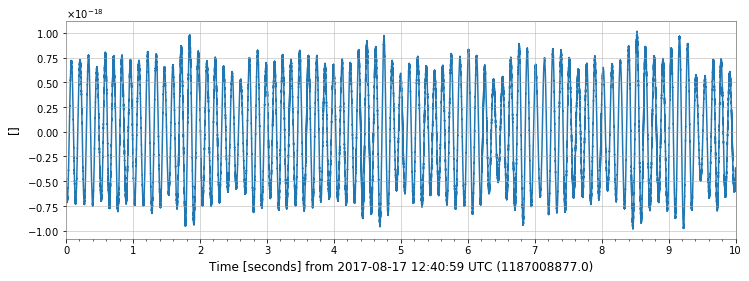

In [8]:
plot = hdata.plot()

## Reading local files

The `fetch_open_data()` method requires an internet connection to retrieve data on-the-fly.
In some cases it can be very useful to manually download the data onto your machine and read it locally.
This can be done using the [`TimeSeries.read`](https://gwpy.github.io/docs/stable/timeseries/io.html) method:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55.2M  100 55.2M    0     0  12.8M      0  0:00:04  0:00:04 --:--:-- 12.8M


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


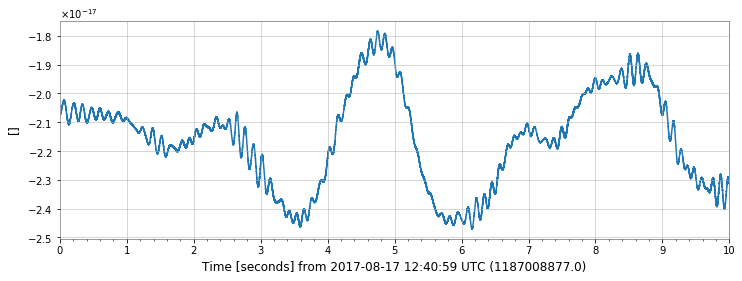

In [9]:
!curl -O https://www.gw-openscience.org/GW170817data/H-H1_LOSC_CLN_4_V1-1187007040-2048.hdf5
hdata2 = TimeSeries.read('H-H1_LOSC_CLN_4_V1-1187007040-2048.hdf5', start=segment[0], end=segment[1], format='hdf5.losc')
plot2 = hdata2.plot()
plot2.show()

## Challenges

- plot the data for the Virgo detector around GW170814